In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.DataFrame(pd.read_excel('./data/TB201812.xls'))

In [3]:
df1 = df[['订单付款时间','买家会员名','买家实际支付金额','数据采集时间']]

In [4]:
df1.head()

,订单付款时间,买家会员名,买家实际支付金额,数据采集时间
0,2018-01-31 22:45:01,qust99,143.64,2018-12-31
1,2018-01-31 21:02:30,songjones4000,55.86,2018-12-31
2,2018-01-31 20:29:59,133王超,55.86,2018-12-31
3,2018-01-31 17:17:58,扛扛大人,48.86,2018-12-31
4,NaT,楠楠途,0.00,2018-12-31


In [5]:
df1.shape

(2660, 4)

In [6]:
view=df1.describe( include = 'all').T
##包括对数据的基本描述，percentiles参数是指定计算多少的分位数表（如1/4分位数、中位数等）；
#T是转置，转置后更方便查阅;include=‘all’,代表对所有列进行统计，如果不加这个参数，则只对数值列进行统计

In [7]:
view

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
订单付款时间,2148,2033,2018-06-12 13:14:50,4,2017-01-02 23:29:12,2018-12-31 15:21:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
买家会员名,2660,1817,刘思超22,15,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
买家实际支付金额,2660.0,NaN,NaN,NaN,NaT,NaT,155.113094,350.332509,0.0,43.89,62.86,199.0,13246.8
数据采集时间,2660,1,2018-12-31 00:00:00,2660,2018-12-31 00:00:00,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
view['null'] = len(df1)-view['count']

In [9]:
view

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max,null
订单付款时间,2148,2033,2018-06-12 13:14:50,4,2017-01-02 23:29:12,2018-12-31 15:21:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512
买家会员名,2660,1817,刘思超22,15,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
买家实际支付金额,2660.0,NaN,NaN,NaN,NaT,NaT,155.113094,350.332509,0.0,43.89,62.86,199.0,13246.8,0.0
数据采集时间,2660,1,2018-12-31 00:00:00,2660,2018-12-31 00:00:00,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
view = view[['null', 'max', 'min']]
print(view)

         null      max  min
订单付款时间    512      NaN  NaN
买家会员名       0      NaN  NaN
买家实际支付金额  0.0  13246.8  0.0
数据采集时间      0      NaN  NaN


去空（订单付款时间），去除买家实际支付金额为0

In [11]:
df1['订单付款时间'].isnull().sum()

512

In [12]:
(df1['买家实际支付金额']==0).sum()

386

In [13]:
df1.isnull().any()#会判断哪些列包含缺失值，该列存在缺失值则返回True，反之False。

订单付款时间       True
买家会员名       False
买家实际支付金额    False
数据采集时间      False
dtype: bool

In [14]:
df1 =df1[df1['订单付款时间'].notnull() & df1['买家实际支付金额']!=0]

In [15]:
df1.head()

,订单付款时间,买家会员名,买家实际支付金额,数据采集时间
0,2018-01-31 22:45:01,qust99,143.64,2018-12-31
1,2018-01-31 21:02:30,songjones4000,55.86,2018-12-31
2,2018-01-31 20:29:59,133王超,55.86,2018-12-31
3,2018-01-31 17:17:58,扛扛大人,48.86,2018-12-31
5,2018-01-31 13:11:52,耶稣引领的燕儿,258.00,2018-12-31


In [16]:
df1.shape

(2027, 4)

In [17]:
df1['订单付款时间'].isnull().sum()

0

In [18]:
(df1['买家实际支付金额']==0).sum()

0

+ R表示客户最近活跃时间与数据采集点时间距离，时间相减变为天。R越大，表示客户越久未发生交易，R越小，表示客户越近有交易发生。  
+ F代表客户过去某段时间内的活跃频率。F越大，则表示客户同本公司的交易越频繁，是非常忠诚的客户；F越小，则表示客户不够活跃，且可能是竞争对手的常客。  
+ M表示客户每次消费金额的多少，可以用最近一次消费金额，也可以用过去的平均消费金额，根据分析的目的不同，可以有不同的标识方法。一般来讲，单次交易金额较大的客户，支付能力强，价格敏感度低，是较为优质的客户，而每次交易金额很小的客户，可能在支付能力和支付意愿上相对较低。 

R:最近消费时间距数据采集时间的间隔，利用to_datetime转换为时间格式：'yyyy-MM-dd HH:mm:ss'

In [19]:
df1['R']=(pd.to_datetime(df1['数据采集时间']) - pd.to_datetime(df1['订单付款时间']))/np.timedelta64(1, 'D') 

In [20]:
df1.head()

,订单付款时间,买家会员名,买家实际支付金额,数据采集时间,R
0,2018-01-31 22:45:01,qust99,143.64,2018-12-31,333.052072
1,2018-01-31 21:02:30,songjones4000,55.86,2018-12-31,333.123264
2,2018-01-31 20:29:59,133王超,55.86,2018-12-31,333.145845
3,2018-01-31 17:17:58,扛扛大人,48.86,2018-12-31,333.279190
5,2018-01-31 13:11:52,耶稣引领的燕儿,258.00,2018-12-31,333.450093


In [21]:
df2=df1.groupby('买家会员名').agg({'R': 'min','买家实际支付金额':'sum'})

In [22]:
df2.head()

,R,买家实际支付金额
买家会员名,,
00牛哥哥00,692.591435,402.00
020luo,407.855521,74.70
0587xueguangju,625.368148,268.00
0o秋天de童话,82.045532,411.50
0残缺0,345.463183,48.86


In [23]:
df2['F']=df1.groupby("买家会员名")['买家会员名'].size()

In [24]:
df2.head()

,R,买家实际支付金额,F
买家会员名,,,
00牛哥哥00,692.591435,402.00,2
020luo,407.855521,74.70,1
0587xueguangju,625.368148,268.00,1
0o秋天de童话,82.045532,411.50,2
0残缺0,345.463183,48.86,1


In [25]:
df2 = (df2-df2.mean(axis=0))/df2.std(axis=0)

In [26]:
df2.head()

,R,买家实际支付金额,F
买家会员名,,,
00牛哥哥00,2.000318,0.346605,1.091863
020luo,0.508104,-0.269976,-0.413828
0587xueguangju,1.648021,0.094171,-0.413828
0o秋天de童话,-1.199368,0.364502,1.091863
0残缺0,0.181124,-0.318654,-0.413828


In [27]:
df2.columns=['R','M','F']

In [28]:
df2.head()

,R,M,F
买家会员名,,,
00牛哥哥00,2.000318,0.346605,1.091863
020luo,0.508104,-0.269976,-0.413828
0587xueguangju,1.648021,0.094171,-0.413828
0o秋天de童话,-1.199368,0.364502,1.091863
0残缺0,0.181124,-0.318654,-0.413828


In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [30]:
k = 4                       #需要进行的聚类类别数
iteration=500
kmodel = KMeans(n_clusters = k,max_iter=iteration)
data=df2[['R','F','M']]
print(data)
kmodel.fit(data) #训练模型

                       R         F         M
买家会员名                                       
00牛哥哥00         2.000318  1.091863  0.346605
020luo          0.508104 -0.413828 -0.269976
0587xueguangju  1.648021 -0.413828  0.094171
0o秋天de童话       -1.199368  1.091863  0.364502
0残缺0            0.181124 -0.413828 -0.318654
...                  ...       ...       ...
黑瑾瞳            -0.806062  2.597554  0.028538
鼠标右键点          -1.532039 -0.413828 -0.312984
龙哥专用72          0.143081 -0.413828 -0.305467
龙星宇1018         0.509322 -0.413828 -0.037698
龙魂爱上凤灵          0.372785 -0.413828 -0.328073

[1590 rows x 3 columns]


KMeans(max_iter=500, n_clusters=4)

In [31]:
pd.Series(kmodel.labels_)

0       0
1       0
2       0
3       2
4       0
       ..
1585    2
1586    3
1587    0
1588    0
1589    0
Length: 1590, dtype: int32

In [32]:
r=pd.Series(kmodel.labels_).value_counts()

In [33]:
r

0    755
3    560
2    273
1      2
dtype: int64

In [34]:
pd.DataFrame(kmodel.cluster_centers_)

,0,1,2
0,0.832189,-0.334057,-0.025902
1,-1.179039,4.103245,24.084877
2,-0.477530,1.742674,0.230608
3,-0.884962,-0.413828,-0.163517


In [35]:
data=pd.concat([data,pd.Series(kmodel.labels_,index=data.index)], axis=1)

In [36]:
data.columns=['R','F','M','聚类类别']

In [37]:
data.head()

,R,F,M,聚类类别
买家会员名,,,,
00牛哥哥00,2.000318,1.091863,0.346605,0
020luo,0.508104,-0.413828,-0.269976,0
0587xueguangju,1.648021,-0.413828,0.094171,0
0o秋天de童话,-1.199368,1.091863,0.364502,2
0残缺0,0.181124,-0.413828,-0.318654,0


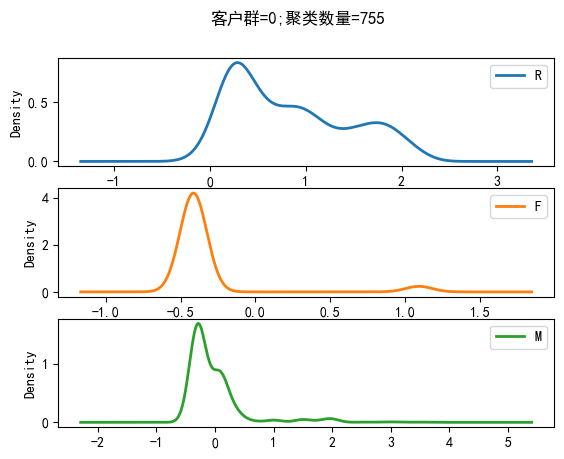

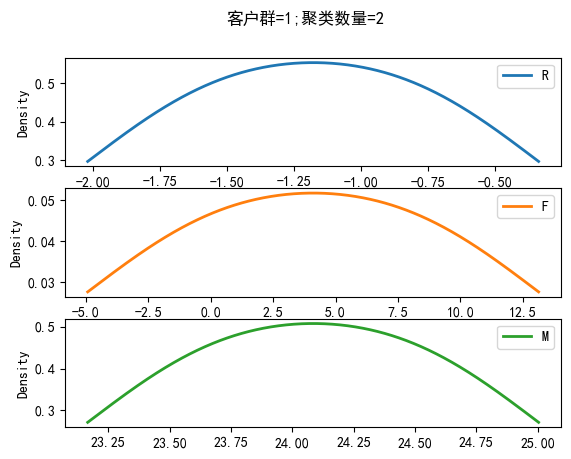

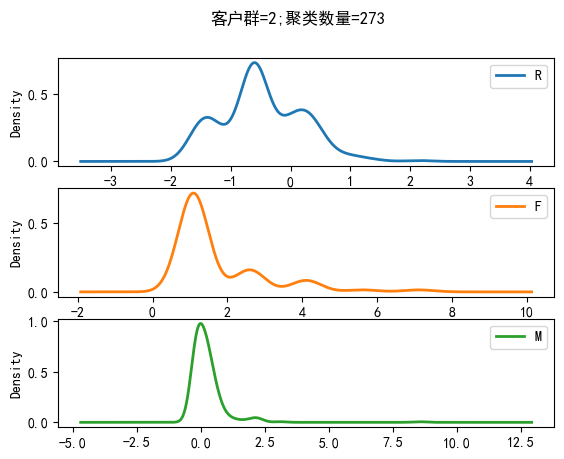

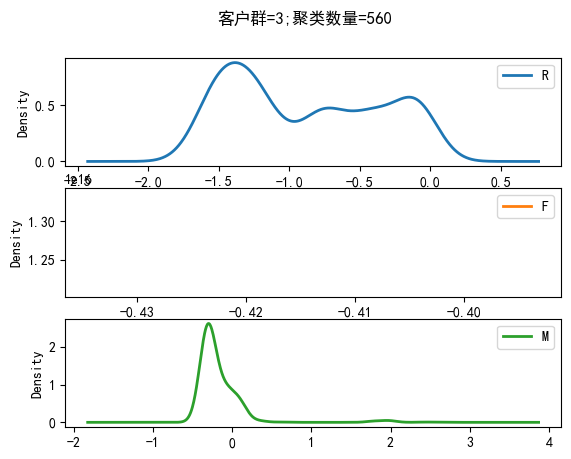

In [38]:
plt.rcParams['font.sans-serif']=['SimHei']  #运行配置参数中的字体（font）为黑体（SimHei）
plt.rcParams['axes.unicode_minus']=False    #运行配置参数总的轴（axes）正常显示正负号（minus）
for i in range(k):
    cls=data[data['聚类类别']==i].drop(columns = '聚类类别')
    cls.plot(kind='kde',linewidth=2,subplots=True,sharex=False) #subplot,将各个DataFrame列绘制到单独的subplot中,sharex,如果subplots=True，则共用同一个X轴，包括刻度和界限
    plt.suptitle('客户群=%d;聚类数量=%d' %(i,r[i]))
    plt.legend()
    plt.show()